In [2]:
import tensorflow as tf


In [3]:
a = tf.Variable(4, name= 'a')
b = tf.Variable(2, name= 'b')
f = a+b
f

Instructions for updating:
Colocations handled automatically by placer.


<tf.Tensor 'add:0' shape=() dtype=int32>

In [4]:
init = tf.global_variables_initializer() #initializing the variable space

In [5]:
with tf.Session() as s:
    init.run()
    print(f.eval()) ##creating compitation grapf and then performing operation.


6


In [7]:
from tensorflow.examples.tutorials.mnist import input_data
sess = tf.InteractiveSession()
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)
mnist

C:\Users\visha\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000021AD9B16240>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000021AD9B16A20>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000021AD9B16828>)

In [8]:
import matplotlib.pyplot as plt

In [9]:
def display_num(num):
    print(mnist.train.labels[num])
    label = mnist.train.labels[num].argmax(axis=0)
    #get the highest element in the one hot array and convert that into the actual number that can be represented in the human readable format
    image = mnist.train.images[num].reshape([28,28]) # reshape the 768 value matrix to 28*28 matrix
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


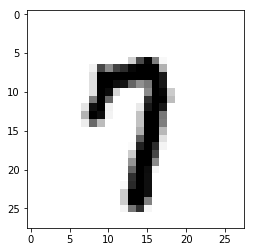

In [11]:
display_num(16000)

In [12]:
import numpy as np

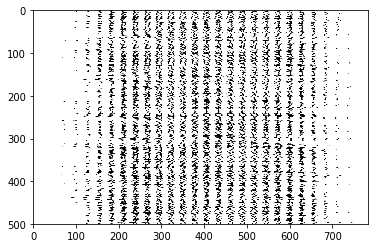

In [18]:
images=mnist.train.images[0].reshape([1,784])
for i in range(1,500):
    images=np.concatenate((images,mnist.train.images[i].reshape(1,784)))
    
plt.imshow(images,cmap=plt.get_cmap('gray_r'))
plt.show()

In [19]:
input_images=tf.placeholder(tf.float32,shape=[None,784])
target_lables=tf.placeholder(tf.float32,shape=[None,10])

In [ ]:
#defining the topology of neural network

In [21]:
#here we are creating variables that will hold the memory for our neural network

hidden_nodes=512
input_weights=tf.Variable(tf.truncated_normal([784,hidden_nodes]))
input_biases=tf.Variable(tf.zeros([hidden_nodes]))


hidden_weights=tf.Variable(tf.truncated_normal([hidden_nodes,10]))
hidden_biases=tf.Variable(tf.zeros([10]))

In [22]:
#here we are defining the connections and the layers themselves

input_layer=tf.matmul(input_images,input_weights)
hidden_layer=tf.nn.relu(input_layer+input_biases)
digit_weights=tf.matmul(hidden_layer,hidden_weights)+hidden_biases

In [24]:
# to measure the correctness of our results we define our loss function

loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights,labels=target_lables))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [25]:
optimizer=tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [26]:
correct_prediction=tf.equal(tf.argmax(digit_weights,1),tf.argmax(target_lables,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [31]:
tf.global_variables_initializer().run()
for x in range(2000):
    batch=mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images:batch[0],target_lables:batch[1]})
    if((x+1) % 100==0):
        print('training epoch'+str(x+1))
        print('accuracy:'+str(accuracy.eval(feed_dict={input_images:mnist.test.images,target_lables:mnist.test.labels})))

training epoch100
accuracy:0.8303
training epoch200
accuracy:0.8496
training epoch300
accuracy:0.8609
training epoch400
accuracy:0.87
training epoch500
accuracy:0.8739
training epoch600
accuracy:0.8836
training epoch700
accuracy:0.8918
training epoch800
accuracy:0.8874
training epoch900
accuracy:0.8975
training epoch1000
accuracy:0.9043
training epoch1100
accuracy:0.9008
training epoch1200
accuracy:0.9085
training epoch1300
accuracy:0.91
training epoch1400
accuracy:0.9107
training epoch1500
accuracy:0.9151
training epoch1600
accuracy:0.9135
training epoch1700
accuracy:0.9167
training epoch1800
accuracy:0.9141
training epoch1900
accuracy:0.9176
training epoch2000
accuracy:0.9192


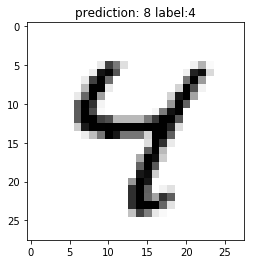

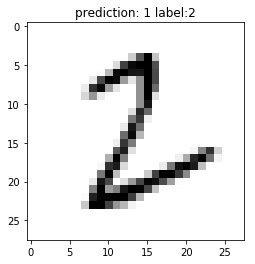

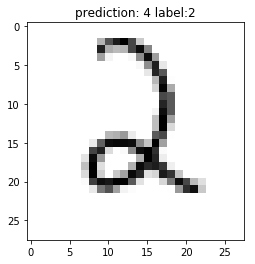

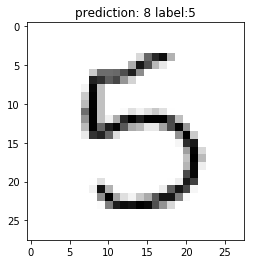

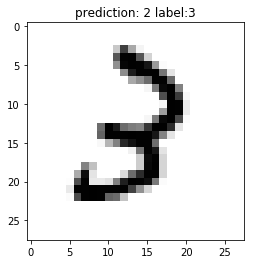

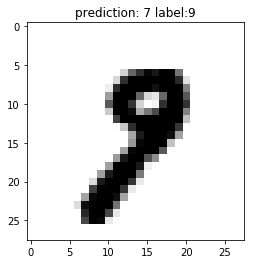

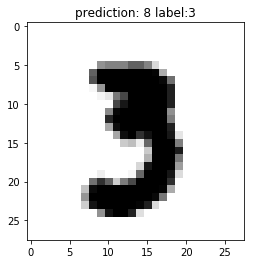

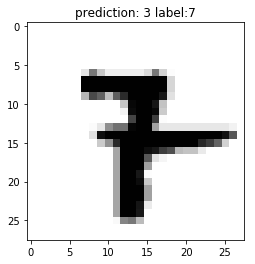

In [33]:
for x in range(100):
    #load a single image and its label
    x_train=mnist.test.images[x,:].reshape(1,784)
    y_train=mnist.test.labels[x,:]
    
    #convert the ohe hot label to an integer
    
    label=y_train.argmax()
    
    #get the classification for our neural network's digit weights final layer and convert to integer
    prediction =sess.run(digit_weights,feed_dict={input_images:x_train}).argmax()
    #if prediction does not match the correct label display it
    
    if(prediction != label):
        plt.title('prediction: %d label:%d' %(prediction,label))
        plt.imshow(x_train.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()